2
2
2
2
2
2
2
2


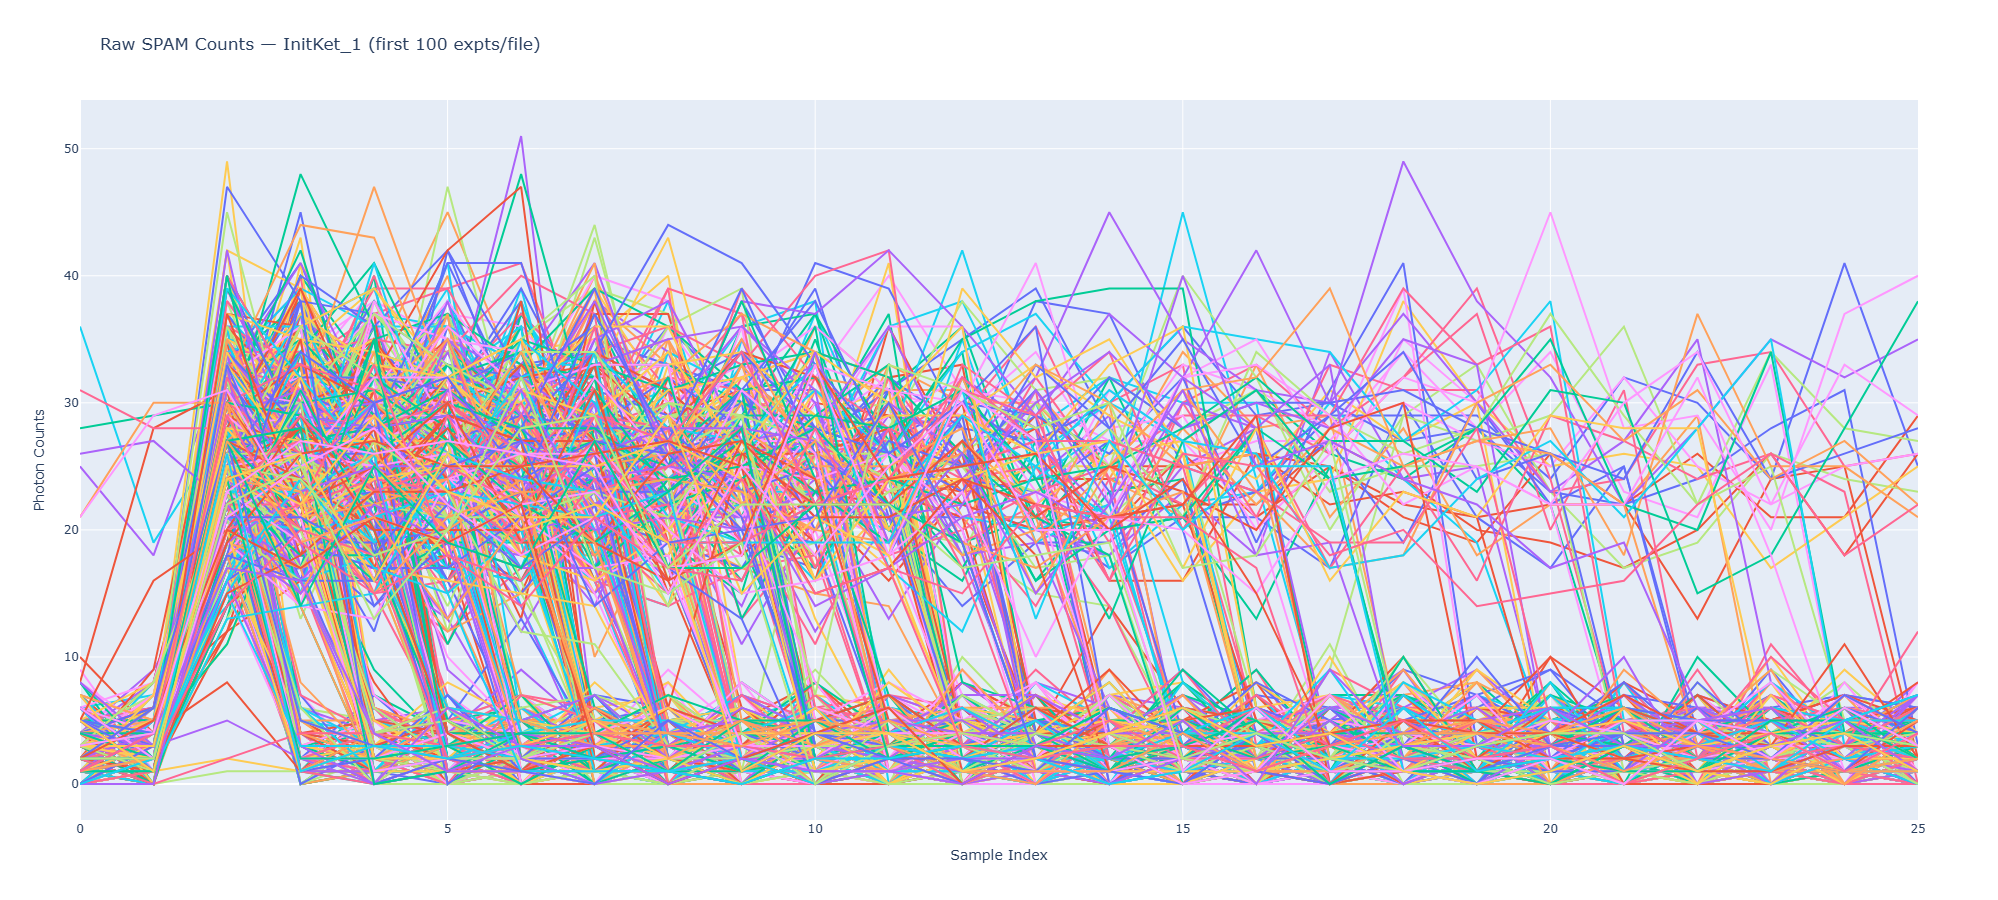

In [27]:
import os
import glob
import json
from datetime import datetime

import plotly.graph_objs as go

def load_raw_experiments_with_metadata(folder_path):
    """
    Returns a list of (timestamp, experiments) for each file in folder_path,
    where `experiments` is itself a list of count‐vectors (one per JSON line).
    """
    file_pattern = os.path.join(folder_path, 'SPAM_10k_Heralded_*')
    files = sorted(glob.glob(file_pattern))
    raw_data = []
    for fn in files:
        ts = datetime.fromtimestamp(os.path.getmtime(fn))
        experiments = []
        with open(fn, 'r') as f:
            for line in f:
                data = json.loads(line)
                # append entire experiment (list of counts)
                experiments.append(data[0]['0'])
        raw_data.append((ts, experiments))
        print(len(raw_data[0]))
    return raw_data

def plot_raw_data(folder_path, max_experiments=100):
    raw_data = load_raw_experiments_with_metadata(folder_path)
    fig = go.Figure()
    for ts, experiments in raw_data:
        base = ts.strftime('%Y-%m-%d %H:%M:%S')
        for idx, counts in enumerate(experiments[:max_experiments], start=1):
            fig.add_trace(go.Scatter(
                x=list(range(len(counts))),
                y=counts,
                # mode='markers',           # ← change here
                marker=dict(
                    size=4,               # point size in pixels
                    opacity=0.6,          # semi‑transparent
                    symbol='circle'       # you can choose e.g. 'square', 'diamond', etc.
                ),
                name=f'{base} (#{idx})'
            ))
    fig.update_layout(
        title=f'Raw SPAM Counts — {os.path.basename(folder_path)} '
              f'(first {max_experiments} expts/file)',
        xaxis_title='Sample Index',
        yaxis_title='Photon Counts',
        showlegend=False,
        width=1400,
        height=900
    )
    fig.show()
base_dir = r'Z:\Lab Data\25lvl_SPAM\10K_SPAM_raw_data\Main_Data'
num_kets = 25  
ket_folders = [os.path.join(base_dir, f'InitKet_{i}') for i in range(num_kets)]
# for folder in ket_folders:
plot_raw_data(ket_folders[1])


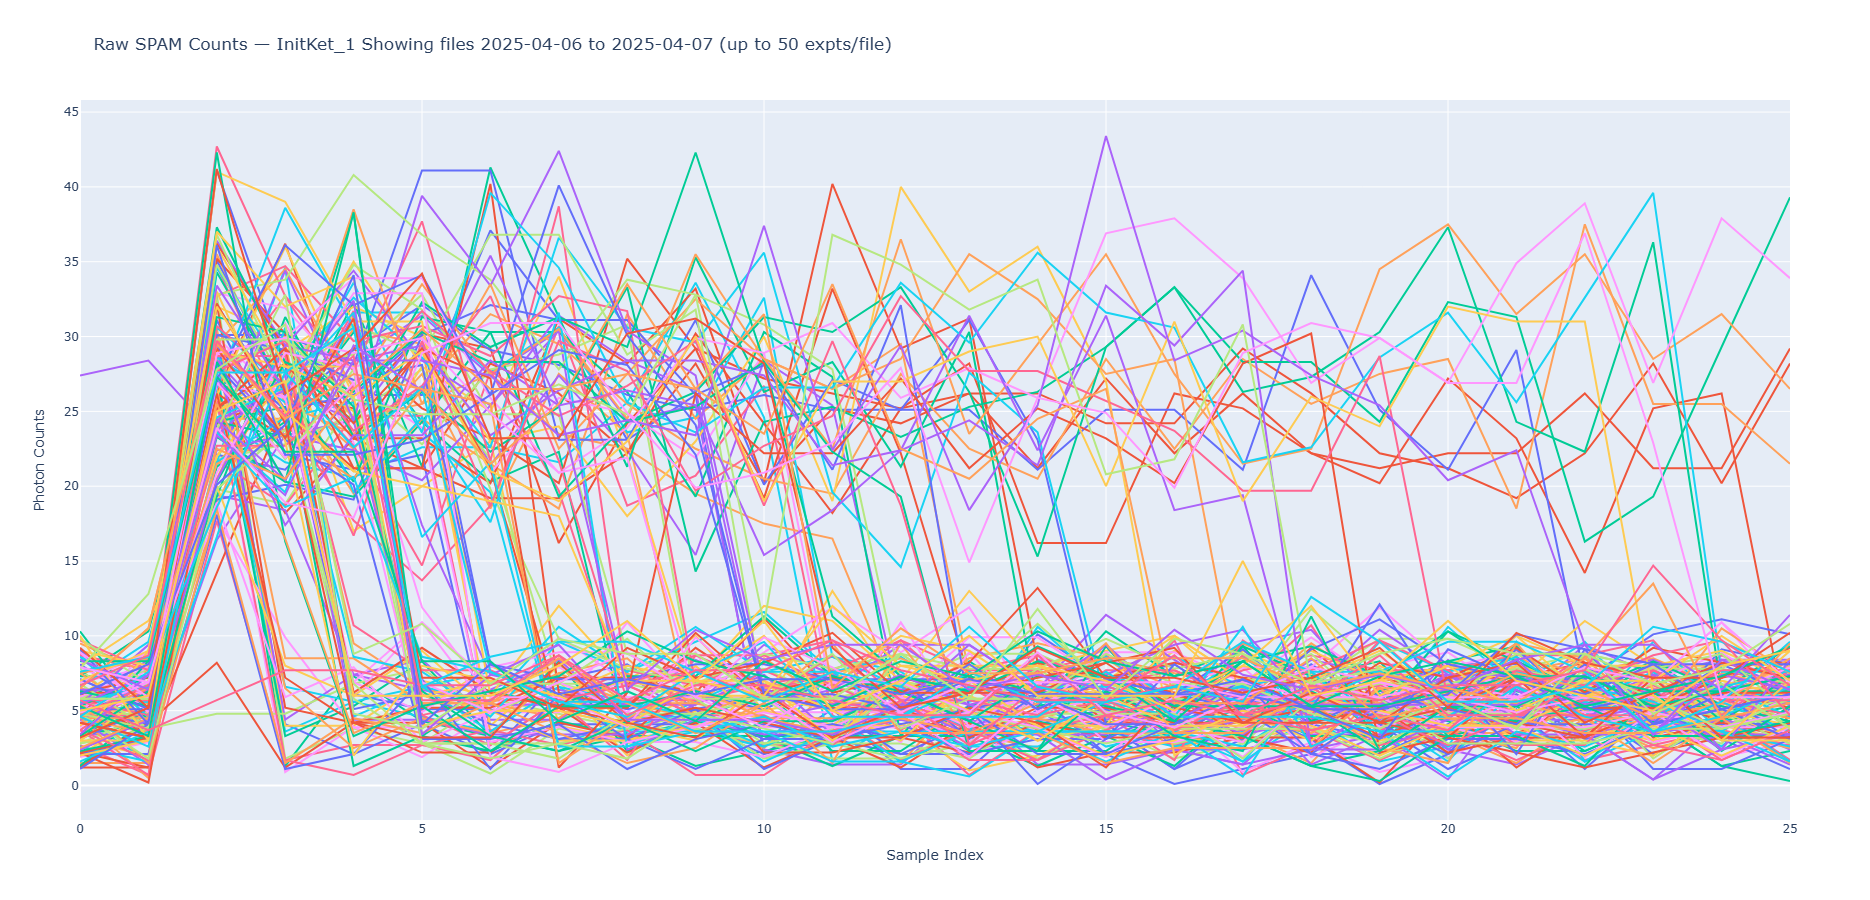

In [47]:
import os
import glob
import json
from datetime import datetime, date
import numpy as np
import plotly.graph_objs as go

def load_raw_experiments_with_metadata(
    folder_path,
    start_date: date = None,
    end_date:   date = None
):
    """
    Returns a list of (timestamp, experiments) for each file in folder_path
    whose modification date is within [start_date, end_date].
    `experiments` is a list of count‐vectors (one per JSON line).
    """
    file_pattern = os.path.join(folder_path, 'SPAM_10k_Heralded_*')
    files = sorted(glob.glob(file_pattern))
    raw_data = []

    for fn in files:
        ts = datetime.fromtimestamp(os.path.getmtime(fn))
        ts_date = ts.date()
        # filter by date
        if start_date and ts_date < start_date:
            continue
        if end_date and ts_date > end_date:
            continue

        experiments = []
        with open(fn, 'r') as f:
            for line in f:
                data = json.loads(line)
                experiments.append(data[0]['0'])
        raw_data.append((ts, experiments))

    return raw_data

def plot_raw_data(
    folder_path,
    max_experiments=5000,
    start_date: date = None,
    end_date:   date = None
):
    """
    Plots only the files whose modification dates are in [start_date, end_date].
    """
    raw_data = load_raw_experiments_with_metadata(
        folder_path,
        start_date=start_date,
        end_date=end_date
    )

    if not raw_data:
        print("No files in the specified date range.")
        return

    fig = go.Figure()
    for ts, experiments in raw_data:
        base = ts.strftime('%Y-%m-%d %H:%M:%S')
        for idx, counts in enumerate(experiments[:max_experiments], start=1):
            fig.add_trace(go.Scatter(
                x=list(range(len(counts))),
                y=np.array(counts)+ 0.1*idx,
                # mode='markers',           # or 'lines' or 'lines+markers'
                marker=dict(size=4, opacity=0.6, symbol='star'),
                name=f'{base} (#{idx})'
            ))

    fig.update_layout(
        title=(
            f'Raw SPAM Counts — {os.path.basename(folder_path)}\n'
            f'Showing files {start_date or "–"} to {end_date or "–"} '
            f'(up to {max_experiments} expts/file)'
        ),
        xaxis_title='Sample Index',
        yaxis_title='Photon Counts',
        showlegend=False,
        width=1400,
        height=900
    )
    fig.show()


# ─── Example usage ──────────────────────────────────────────────────────────────

base_dir = r'Z:\Lab Data\25lvl_SPAM\10K_SPAM_raw_data\Main_Data'
ket_folders = [os.path.join(base_dir, f'InitKet_{i}') for i in range(25)]

# Only plot files modified between April 1 and April 15, 2025:
start = date(2025, 4, 6)
end   = date(2025, 4, 7)
plot_raw_data(ket_folders[1], max_experiments=50, start_date=start, end_date=end)
